# Setup
Setting up the data of the mouse cortex and the odorants together

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.cluster.hierarchy import cut_tree, fcluster
from scipy.spatial.distance import squareform


from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# special function: load_odorants()
# Helper Function to load the odorant data.
def load_odorants():
  odorants = pd.concat(
      [
          pd.read_csv('data/omp8x_odornames.txt', header=None, names=['Odorant']),
          pd.read_csv('data/omp8x_smiles.txt', header=None, names=['SMILES'])
      ],
      axis=1
  ).rename_axis('Odorant #')
  odorants['Name'] = odorants['Odorant'].apply(lambda x: ' '.join(x.split()[1:]))
  odorants['Group'] = odorants['Odorant'].apply(lambda x: x.split()[0][0])
  # 'P4 2-ethyl-3-methylpyrazine' and 'P3 2-methoxy-3(5 or 6)-isopropylpyrazine' have duplicate SMILES
    # Checking with M.W., it appears the P3 SMILES is incorrect; fix here using M.W.'s provided correction
      # M.W wants us to fix this
  odorants.loc[odorants['Odorant'] == 'P3 2-methoxy-3(5 or 6)-isopropylpyrazine', 'SMILES'] == 'CC(C)C1=CN=CC(=N1)OC'

    # Encode Group as int for plotting purposes
  odorants['Group_num'] = LabelEncoder().fit_transform(odorants['Group'])

  return odorants



odorants = load_odorants()
odorants.head(10)

,Odorant,SMILES,Name,Group,Group_num
Odorant #,,,,,
0,C7 propionic acid,CCC(O)=O,propionic acid,C,0
1,C1 butyric acid,CCCC(O)=O,butyric acid,C,0
2,C2 2-methylbutyric acid,CCC(C)C(O)=O,2-methylbutyric acid,C,0
3,C3 valeric acid,CCCCC(O)=O,valeric acid,C,0
4,C6 isovaleric acid,CC(C)CC(O)=O,isovaleric acid,C,0
5,D15 methacrolein,CC(=C)C=O,methacrolein,D,1
6,D16 butyraldehyde,CCCC=O,butyraldehyde,D,1
7,D1 2-methylbutyraldehyde,CCC(C)C=O,2-methylbutyraldehyde,D,1
8,D2 trans-2-methyl-2-butenal,C\C=C(/C)C=O,trans-2-methyl-2-butenal,D,1


In [5]:
# Load the data
odorants = pd.read_csv("data/odorants.csv") # data prepared before
data_1h = pd.read_csv("data/omp8x_1_high.txt").T
data_2h = pd.read_csv("data/omp8x_2_high.txt").T
data_3h = pd.read_csv("data/omp8x_3_high.txt").T
data_4h = pd.read_csv("data/omp8x_4_high.txt").T
data_1l = pd.read_csv("data/omp8x_1_low.txt").T
data_2l = pd.read_csv("data/omp8x_2_low.txt").T
data_3l = pd.read_csv("data/omp8x_3_low.txt").T
data_4l = pd.read_csv("data/omp8x_4_low.txt").T

data_vector = [data_1h, data_2h, data_3h, data_4h, data_1l, data_2l, data_3l, data_4l]
names = ["OB 1 High", "OB 2 High", "OB 3 High", "OB 4 High", "OB 1 Low", "OB 2 Low", "OB 3 Low", "OB 4 Low"]

idx_gloms = data_vector

# Set the Data with Odorant Index
for i in idx_gloms:
    i.set_index(odorants['Group_name'], inplace=True)

In [7]:
# R Cosine Distances as calculated by the R program:

dist1 = pd.read_csv('data/dist_list1.csv')
dist2 = pd.read_csv('data/dist_list2.csv')
dist3 = pd.read_csv('data/dist_list3.csv')
dist4 = pd.read_csv('data/dist_list4.csv')
dist5 = pd.read_csv('data/dist_list5.csv')
dist6 = pd.read_csv('data/dist_list6.csv')
dist7 = pd.read_csv('data/dist_list7.csv')
dist8 = pd.read_csv('data/dist_list8.csv')

dist_list = [dist1, dist2, dist3, dist4, dist5, dist6, dist7, dist8]

for i in range(len(dist_list)):
    dist_matrix = np.array(dist_list[i])
    dist_matrix = dist_matrix[0:, 1:]
    # dist_matrix = pd.DataFrame(dist_matrix)
    dist_list[i] = dist_matrix

dist_list[0]

sq_dist_list = [squareform(i) for i in dist_list] # condensed form for Cophenetic test

# Cophenetic Correlations of Different Linkages Test
Here we plot the CC coefficient to see which linkage method is best for clustering our data.

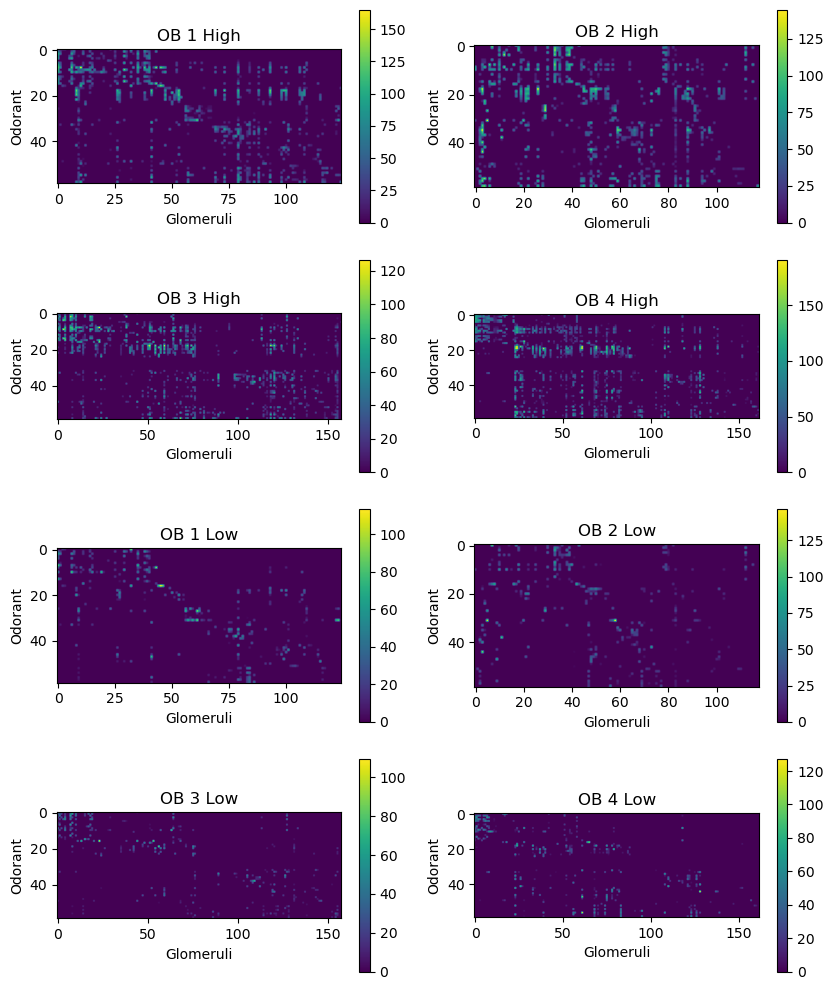

In [8]:
### Plot the activations of the Glomeruli

fig, axes = plt.subplots(4, 2, figsize=(8.5, 10))
axes = axes.flatten()
for i, data in enumerate(data_vector):
    im = axes[i].imshow(data)
    fig.colorbar(im, ax=axes[i])
    axes[i].set_title(names[i])
    axes[i].set_xlabel('Glomeruli')
    axes[i].set_ylabel('Odorant')
plt.tight_layout()
plt.show()

Glomeruli: OB 1 High
Glomeruli: OB 2 High
Glomeruli: OB 3 High
Glomeruli: OB 4 High
Glomeruli: OB 1 Low
Glomeruli: OB 2 Low
Glomeruli: OB 3 Low
Glomeruli: OB 4 Low
             single  complete   average  weighted
OB 1 High  0.651000  0.718804  0.840748  0.830069
OB 2 High  0.696396  0.673792  0.813261  0.755602
OB 3 High  0.681166  0.666432  0.756843  0.704940
OB 4 High  0.646724  0.629852  0.726657  0.708202
OB 1 Low   0.546315  0.765000  0.853523  0.830464
OB 2 Low   0.566527  0.619849  0.705395  0.691290
OB 3 Low   0.734371  0.873866  0.898516  0.884763
OB 4 Low   0.698336  0.801982  0.820370  0.782379
Means      0.652604  0.718697  0.801914  0.773464


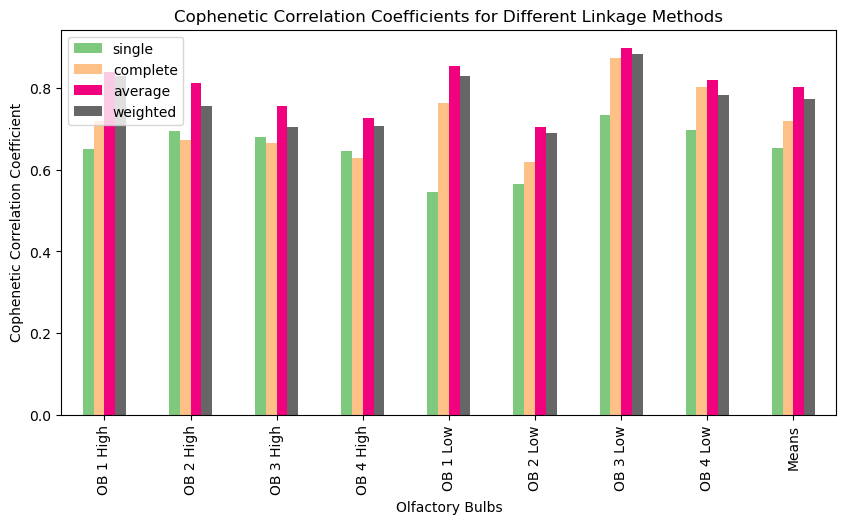

In [9]:
### Cophenetic Correlations to determine best linkage type for Cosine Data

linkage_methods = ['single', 'complete', 'average', 'weighted']
cophenet_correlations = []

data_vector = [i + 1e-10 for i in data_vector] 
# to eleminate division by zero in the following dataset iff metric == 'cosine'

for glom in range(8):
    print(f'Glomeruli: {names[glom]}')
  
    for i in linkage_methods:
        Z = linkage(data_vector[glom], i, metric='cosine')
        c, coph_dists = cophenet(Z, sq_dist_list[glom]) 
        # cophenet returns c: correlation and coph_dists: cophenetic distance matrix compressed.
        cophenet_correlations.append(c) 
       
cophenetic_corr_table = pd.DataFrame(np.array(cophenet_correlations).reshape(8,4), columns=linkage_methods, index=names)

average_cophenetic = cophenetic_corr_table.sum(axis=0)/8
cophenetic_corr_table = pd.concat([cophenetic_corr_table, average_cophenetic.to_frame().T], ignore_index= False)
cophenetic_corr_table.rename(index={cophenetic_corr_table.index[-1]: 'Means'}, inplace=True)
print(cophenetic_corr_table)

# cophenetic_corr_table.to_csv('cophenetic_table.csv')

cophenetic_corr_table.plot(kind='bar', figsize=(10, 5), colormap = 'Accent', linewidth=5)
plt.title('Cophenetic Correlation Coefficients for Different Linkage Methods')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.xlabel('Olfactory Bulbs')
plt.show()

As we can see we decided to go with average linkage. It calclulates the average between the longest and shortest distances between the linkages and averages them. 

# Elbow Curve for WCSS
This is the main metric we are going to use when we cluster the distance matrices together.

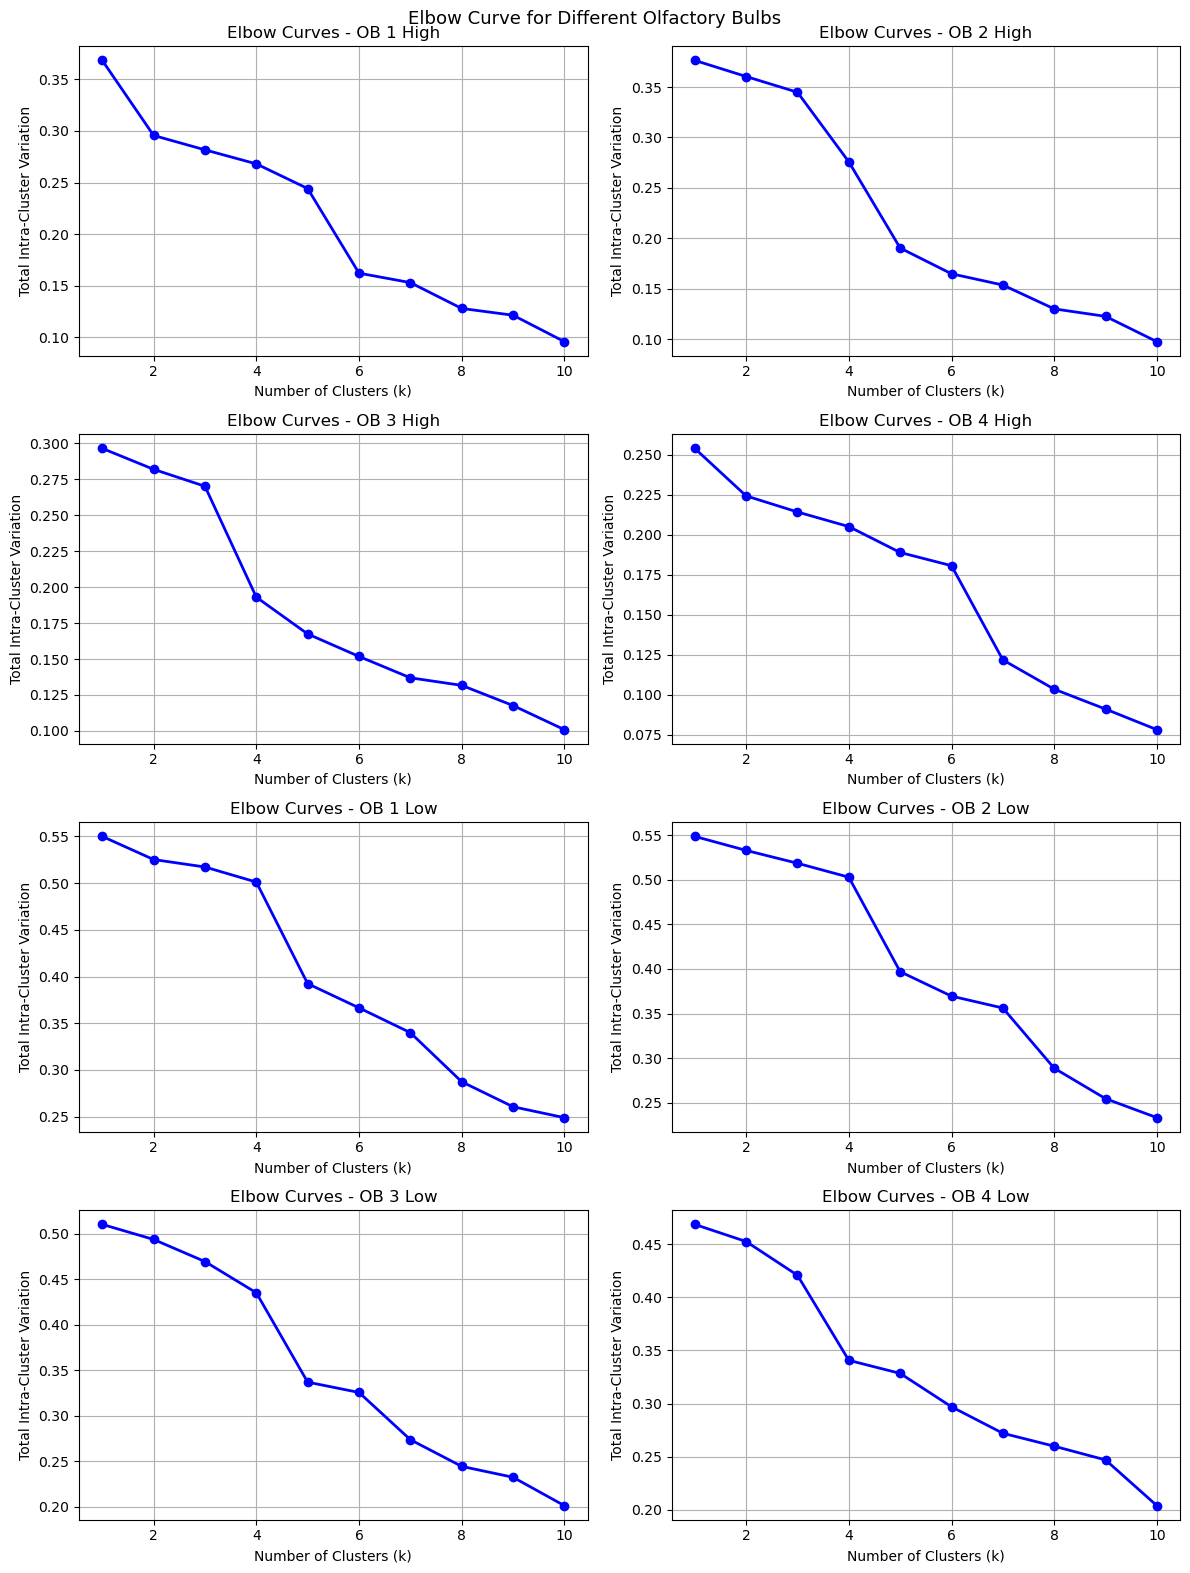

In [ ]:
def elbow_curve(data_vector, names, max_clusters=10):

    """
   # Similar to https://medium.com/@lucasnogsousa/choosing-the-optimal-amount-of-clustering-elbow-method-part-1-6584d82a2bea

    Helper function that does the calculations to plot the Intra Cluster Variation Elbow Plot.
    It uses as both distance metrics the cosine distance, both for hierarchical clustering and for the distance data to centroid. 
    """
    
    data_vector = [np.where(data == 0, 1e-10, data) for data in data_vector]  # Replace zeros  
    fig, ax = plt.subplots(4, 2, figsize=(12, 16))
    ax = ax.ravel()
    fig.suptitle('Elbow Curve for Different Olfactory Bulbs', fontsize=13)
    
    for idx, data in enumerate(data_vector):
        wcss_values = []
        
        for k in range(1, max_clusters + 1):
            Z = linkage(data, method='average', metric='cosine')
            clusters = fcluster(Z, k, criterion='maxclust')
            unique_clusters = np.unique(clusters)
            
            wcss = 0
            for cluster in unique_clusters:
                cluster_points = data[clusters == cluster]
                centroid = cluster_points.mean(axis=0)
                distances = cdist(cluster_points, [centroid], metric='cosine')
                wcss += (distances**2).sum()
                
            wcss_values.append(wcss / data.shape[0])
            
        # Plot WCSS curve
        ax[idx].plot(range(1, max_clusters + 1), wcss_values, 'bo-', lw=2)
        ax[idx].set_title(f'Elbow Curves - {names[idx]}')
        ax[idx].set_xlabel('Number of Clusters (k)')
        ax[idx].set_ylabel('Total Intra-Cluster Variation')
        ax[idx].grid(True)
        
    plt.tight_layout()
    return fig, ax


fig, ax = elbow_curve(data_vector, names)
plt.show()

We have the other functions mentioned to test for optimal number of clusters K. We can try other ones. They however did not perform well enough with our data. That's why the method above was chosen and tinkered to work better.

2
2
2
2
2
2
2
2


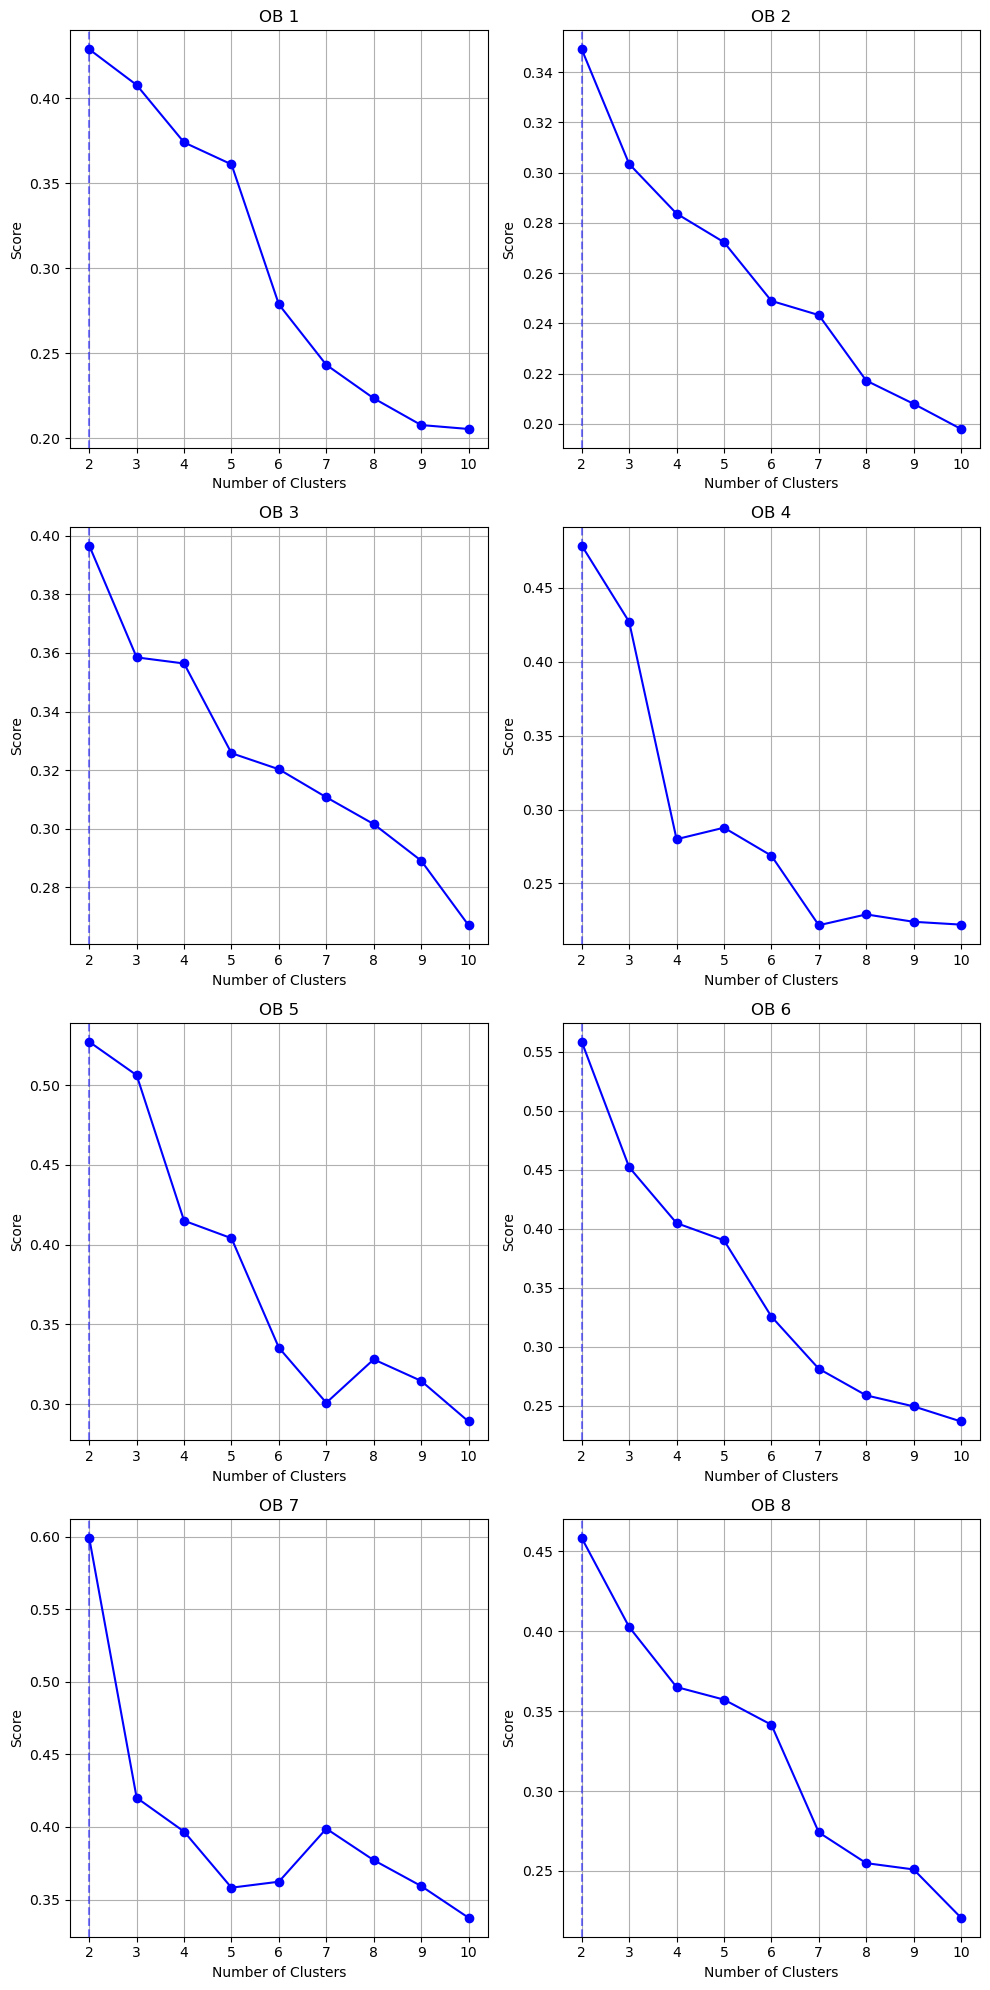

In [19]:
## Cluster score Index curve

def OptimalClusters(data, linkages='centroid', maximum = 10, type_of_score = 'silhouette', graph = True):

    """
    You can use silhouette_score, davies_bouldin_score, calinski_harabasz_scores.
    For Silhouette we want a higher score, to see the correlations
    For davies_bouldin we want a lower score for improving clustering
    For CH, we want a higher score.

    """
    data = data + 1e-10
    s_scores = [] # for silhouette scores
    Z = linkage(data, method=linkages)
    for i in range(2, maximum + 1):
        
        clusters = fcluster(Z, i, criterion='maxclust')
        if type_of_score == 'silhouette':
            s_scores.append(silhouette_score(data, clusters, metric='euclidean'))
        elif type_of_score == 'davies_bouldin':
            s_scores.append(davies_bouldin_score(data, clusters))

        elif type_of_score == 'calinski_harabasz':
            s_scores.append(calinski_harabasz_score(data, clusters))

    if type_of_score == "davis bouldin":
        print(np.argmax(s_scores) + 2)
    else:
        print(np.argmax(s_scores) + 2)
    
    
    return s_scores

def main():
    fix, axes = plt.subplots(4,2,figsize = (10, 20))
    axes = axes.ravel()

    for i, j in enumerate(data_vector):
        k = OptimalClusters(j, linkages='average', maximum=10,
                            type_of_score='silhouette') # Select scoring method here


        axes[i].plot(range(2,11), k, 'bo-')
        axes[i].set_xlabel("Number of Clusters")
        axes[i].set_ylabel('Score')
        axes[i].set_title(f'OB {i + 1}')
        axes[i].grid(True)

        best_k = np.argmax(k) + 2 # correct ### arg max for other scores depending on which.
        axes[i].axvline(x=best_k, color='b', linestyle='--', alpha=0.5)
    

    plt.tight_layout()
    plt.show()

main()    

We also tried gap statistic with a Gamma Distribution Reference Curve.

# Grid Search for Best Classifier

We thought of using predictive accuracy on two datasets of high and low concentrations in order to see whether we can find a significant enough difference between the two concentration conditions. \
First we set up the grid search pipelines architecture to see what predictive algorithm we should use.


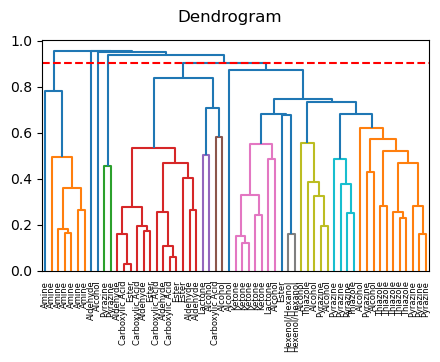

In [29]:
### Function to cut the clusters and plot them if needed.
def tree_clusters(data, linkage_meth = 'average', metrics = 'cosine', n_cluster = 5  ,graph = False):

    """ 
    This function allows us to look and extract clusters from the dendrograms.
    It has customisable parameters and has proven useful for exploratory purposes.
    """

    np.random.seed(42)
    if metrics == 'cosine':
        data = data + 1e-15 + np.random.normal(0, 1e-8, data.shape)
        # do the epilson trick to avoid division by zero. since it has been a problem with our datasets.
    else:
        pass
    
    Z = linkage(data, linkage_meth, metric=metrics)
    # replace with wwhatever linkage method you want to use.
    if graph == True:
        fig = plt.figure(figsize=(5,3))
        fig.suptitle("Dendrogram")
        dendrogram(Z,labels=data.index)
        plt.axhline(y=Z[-n_cluster,2], color='r', linestyle='--')
        plt.show
        clusters = cut_tree(Z,n_clusters=n_cluster).flatten()
        indexes = pd.DataFrame({"Cluster":clusters,"Odorant":data.index})
        clustered_odorants = indexes.sort_values(by='Cluster')
    else:
        clusters = cut_tree(Z,n_clusters=n_cluster).flatten()
        indexes = pd.DataFrame({"Cluster":clusters,"Group_name":data.index})
        clustered_odorants = indexes.sort_values(by='Cluster')

    return clustered_odorants

def main():
    clustered_gloms = []
    for i in range(8):
        clustered_gloms.append(tree_clusters(data_vector[i], "average", "cosine", n_cluster= 5, graph=True))
        return clustered_gloms

clustered_gloms = main()

In [ ]:
### Visualise odorant co-clustering
import seaborn as sns
fig, axes = plt.subplots(4, 2, figsize=(8.5, 10))
for i, data in enumerate(clustered_gloms[0:8]):
    ax = axes[i // 2, i % 2]
    sns.heatmap(data.pivot_table(index='Cluster', columns='Group_name', aggfunc='size'), cmap='viridis', ax=ax)
    ax.set_title(f'Heatmap for {names[i]}')
    ax.set_xlabel('Group Name', fontsize=8)
    ax.set_ylabel('Cluster',fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
plt.tight_layout()
plt.show()

Now the Grid Search

In [ ]:
def trainTestConcentration():

    """Separates the data into high and low concentration and combinations of train test datasets """

    clustered_gloms = []
    for glom in idx_gloms:
        values = tree_clusters(glom, linkage_meth='average', metrics = 'cosine', n_cluster=6)
        clustered_gloms.append(values)

    xh = pd.concat([data_1h,data_2h,data_3h, data_4h])
    xl = pd.concat([data_1l,data_2l,data_3l, data_4l])
    xh = xh.iloc[:,:117] # Trim the data to avoid NA error when we aggregate them otgether.
    xl = xl.iloc[:,:117]

    yh = pd.concat([clustered_gloms[0]['Cluster'],clustered_gloms[1]['Cluster'],clustered_gloms[2]['Cluster'], clustered_gloms[3]['Cluster']])
    yl = pd.concat([clustered_gloms[4]['Cluster'], clustered_gloms[5]['Cluster'], clustered_gloms[6]['Cluster'], clustered_gloms[7]['Cluster']])
    xh_train, xh_test, yh_train, yh_test = train_test_split(xh, yh, test_size=0.20, random_state=42, stratify= yh)
    xl_train, xl_test, yl_train, yl_test = train_test_split(xl, yl, test_size=0.20, random_state=42, stratify= yl)

    RF_results = {'Glomeruli': [], 'Best_Params': [], 'Predictive_Accuracy': [], 'Best_Score': []}

    High_high = [xh_train, yh_train, xh_test, yh_test]
    High_Low = [xh_train, yh_train, xl_test, yl_test]
    Low_High = [xl_train, yl_train, xh_test, yh_test]
    Low_Low = [xl_train, yl_train, xl_test, yl_test]

    ds = [High_high, High_Low, Low_High, Low_Low]
    n = ['High_high', 'High_Low', 'Low_High', 'Low_Low']

    return High_high, High_Low, Low_High, Low_Low, ds, n

High_high, High_Low, Low_High, Low_Low, ds, n = trainTestConcentration()

In [ ]:
# Grid search, combing over hyperparameters like it's nobody's business.

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RidgeClassifier())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])

pipeline_mlpc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier())
])


param_grid_svc = {
    'model__C': [0.1, 1, 10, 100, 500, 1000],
    'model__kernel': ['linear', 'rbf']
}

param_grid_ridge = {
    'model__alpha': [0.1, 1, 10, 10, 500, 1000]
}

param_grid_rf = {}

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9, 11, 15, 17, 20]
}

param_grid_nb = {}

param_grid_mlpc = {}


param_grid = [
    {**{'model': [SVC()]}, **param_grid_svc},
    {**{'model': [RidgeClassifier()]}, **param_grid_ridge},
    {**{'model': [RandomForestClassifier()]}, **param_grid_rf},
    {**{'model': [KNeighborsClassifier()]}, **param_grid_knn},
    {**{'model': [GaussianNB]}, **param_grid_nb},
    {**{'model': [MLPClassifier()]}, **param_grid_mlpc}
]
 # Merge the dictionaries for models and parameters to be fet into the GridSearchCV.

grid = GridSearchCV(Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier())]), param_grid, cv=10, n_jobs=-1, scoring='accuracy')

def test_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    print(f"Best score: {model.best_score_:.3f}")
    print(f"Best parameters: {model.best_params_}")
    print(f"Test score: {model.score(x_test, y_test):.3f}")

# Test the model
# test_model(grid, xh_train, yh_train, xh_test, yh_test) # example

We want to run a Grid search for Random Forest Classifier hyperparameters, due to computational complexity. Since this is easier computationally now that we know that a random forest classifier is the better performing. \
We also included a Leave one out cross validation since the size of our data is small.

In [ ]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

param_grid = {
    'model__n_estimators': [50, 100, 200, 100],
    'model__max_depth': [5, 10, 20, 50, None],
    'model__min_samples_split': [2, 5, 10, 20],
}

test_rfc = RandomForestClassifier()
test_grid = GridSearchCV(pipeline_rf, param_grid, cv=LeaveOneOut(), n_jobs=-1, scoring='accuracy', verbose=2)

In [ ]:
def RandomForest_test(x_train, y_train, x_test, y_test):
    test_grid.fit(x_train, y_train)
    y_pred = test_grid.predict(x_test)

    best_prams = test_grid.best_params_
    predictive_accuracy = accuracy_score(y_test, y_pred)
    best_score = test_grid.best_score_

    return best_prams, predictive_accuracy, best_score
# Make a Dataset for the results of the Random Forest Classifier

In [ ]:
for idx, i in enumerate(ds):
    
    RF_results = {}
    best_params, predictive_accuracy, best_score = RandomForest_test(i[0], i[1], i[2], i[3])
    # to make it simpler np.unique(ds[1][0] == xh_train): is TRUE for all. This is what we are iterating over

    RF_results['Glomeruli'].append(n[idx])
    RF_results['Best_Params'].append(best_params)
    RF_results['Predictive_Accuracy'].append(predictive_accuracy)
    RF_results['Best_Score'].append(best_score)

RF_results_Average_Linkage = pd.DataFrame(RF_results)

# RF_results_Average_Linkage.to_csv('results.csv') # optional for saving

Now, we run the Random Forest Classifier. \
We will also visualize the predictive accuracies and confusion matrices.

In [ ]:

clustered_gloms = []
for glom in idx_gloms:
    values = tree_clusters(glom, linkage_meth='average', n_cluster=5)
    clustered_gloms.append(values)

xh = pd.concat([data_1h,data_2h,data_3h, data_4h])
xl = pd.concat([data_1l,data_2l,data_3l, data_4l])
xh = xh.iloc[:,:117]
xl = xl.iloc[:,:117]

yh = pd.concat([clustered_gloms[0]['Cluster'],clustered_gloms[1]['Cluster'],clustered_gloms[2]['Cluster'], clustered_gloms[3]['Cluster']])
yl = pd.concat([clustered_gloms[4]['Cluster'], clustered_gloms[5]['Cluster'], clustered_gloms[6]['Cluster'], clustered_gloms[7]['Cluster']])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# Initialize splitter
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42)

# Create splits
for train_index, test_index in sss.split(xh, yh):
    xh_train, xh_test = xh.iloc[train_index], xh.iloc[test_index]
    yh_train, yh_test = yh.iloc[train_index], yh.iloc[test_index]
    
for train_index, test_index in sss.split(xl, yl):
    xl_train, xl_test = xl.iloc[train_index], xl.iloc[test_index]
    yl_train, yl_test = yl.iloc[train_index], yl.iloc[test_index]

# Verify distributions
t = 1  # Just a way to print and see what is happening with these splits.
if t == 1:
    print("High concentration splits:")
    High_splits = pd.DataFrame({'Train': yh_train.value_counts(normalize=True), 'Test': yh_test.value_counts(normalize=True)})
    print(High_splits)
    print("\nLow concentration splits:")
    Low_splits = pd.DataFrame({'Train': yl_train.value_counts(normalize=True), 'Test': yl_test.value_counts(normalize=True)})
    print(Low_splits)


else:
    pass

# Create datasets
ds = [
    [xh_train, yh_train, xh_test, yh_test],  # High_high
    [xh_train, yh_train, xl_test, yl_test],  # High_Low
    [xl_train, yl_train, xh_test, yh_test],  # Low_High
    [xl_train, yl_train, xl_test, yl_test]   # Low_Low
]

n = ['High_high', 'High_Low', 'Low_High', 'Low_Low']
# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=8, min_samples_split=3, random_state=42, n_jobs=-1,
                             criterion='gini', max_features='sqrt', bootstrap=True,
                             class_weight='balanced_subsample', min_samples_leaf=3)

acc_score = []
mat_list = []
class_report = {}
pa_plot = {'OB': ['High_High', 'High_Low', 'Low_High', 'Low_Low'], 'Predictive_Accuracy': []}
for t in range(4):
    x_train, y_train, x_test, y_test = ds[t]
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)
    pa_plot['Predictive_Accuracy'].append(acc)
    cf_mat = confusion_matrix(y_test, y_pred) 
    mat_list.append(cf_mat) 
    class_report[n[t]] = classification_report(y_test, y_pred, zero_division=0)

print(acc_score)

In [ ]:
# Plot Predictive Accuracy
plt.bar(pa_plot['OB'], pa_plot['Predictive_Accuracy'], color=sb.color_palette('viridis', 4), edgecolor='black')
plt.title('Predictive Accuracy of Random Forest Classifier')
plt.ylabel('Accuracy')
plt.xlabel('Concentration Conditions Tested')
plt.axhline(y=0.2, color='r', linestyle='--')
plt.show()

In [ ]:
# Confusion Matric Plot
fig, ax = plt.subplots(2,2,figsize=(8, 8))
ax = ax.ravel()
for i, cf_mat in enumerate(mat_list):
    
    cf_matrix = cf_mat.astype('float') #  / cf_mat.sum(axis=1).T 
        # sb.set(font_scale=1.4)
    sb.heatmap(cf_matrix, ax=ax[i], annot=True, annot_kws={'size':6},
                cmap='Greens', linewidths=0.2)
    sb.set(font_scale=0.8)
 
    ax[i].set_xlabel('Predicted label', fontsize=7)
    ax[i].set_ylabel('True label', fontsize=7)
    ax[i].set_title(f'Confusion Matrix for {n[i]}', fontsize=10)
    
plt.tight_layout()
plt.show()

In [ ]:
# Print classification Report
CR = []
for i, report in class_report.items():
    crdf = pd.DataFrame(report).transpose()
    CR.append(crdf)

for i in enumerate(CR):
    print(f'Classificaiton Report for {[n[j] for j in range(4)][i[0]]}')
    print(i[1])
    print('\n')

Classifier but without the clustered data but with the original hardcoded groups

In [ ]:
xh = pd.concat([data_1h,data_2h,data_3h, data_4h])
xl = pd.concat([data_1l,data_2l,data_3l, data_4l])
xh = xh.iloc[:,:117]
xl = xl.iloc[:,:117]

yh = pd.concat([odorants['Group'], odorants['Group'],odorants['Group'],odorants['Group']])
yl = pd.concat([odorants['Group'], odorants['Group'],odorants['Group'],odorants['Group']])
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# Initialize splitter
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42)

# Create splits
for train_index, test_index in sss.split(xh, yh):
    xh_train, xh_test = xh.iloc[train_index], xh.iloc[test_index]
    yh_train, yh_test = yh.iloc[train_index], yh.iloc[test_index]
    
for train_index, test_index in sss.split(xl, yl):
    xl_train, xl_test = xl.iloc[train_index], xl.iloc[test_index]
    yl_train, yl_test = yl.iloc[train_index], yl.iloc[test_index]

# Verify distributions
t = 1  # Just a way to print and see what is happening with these splits.
if t == 1:
    print("High concentration splits:")
    High_splits = pd.DataFrame({'Train': yh_train.value_counts(normalize=True), 'Test': yh_test.value_counts(normalize=True)})
    print(High_splits)
    print("\nLow concentration splits:")
    Low_splits = pd.DataFrame({'Train': yl_train.value_counts(normalize=True), 'Test': yl_test.value_counts(normalize=True)})
    print(Low_splits)


else:
    pass

# Create datasets
ds = [
    [xh_train, yh_train, xh_test, yh_test],  # High_high
    [xh_train, yh_train, xl_test, yl_test],  # High_Low
    [xl_train, yl_train, xh_test, yh_test],  # Low_High
    [xl_train, yl_train, xl_test, yl_test]   # Low_Low
]

n = ['High_high', 'High_Low', 'Low_High', 'Low_Low']
# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=8, min_samples_split=3, random_state=42, n_jobs=-1,
                             criterion='gini', max_features='sqrt', bootstrap=True,
                             class_weight='balanced_subsample', min_samples_leaf=3)

acc_score = []
mat_list = []
class_report = {}
pa_plot = {'OB': ['High_High', 'High_Low', 'Low_High', 'Low_Low'], 'Predictive_Accuracy': []}
for t in range(4):
    x_train, y_train, x_test, y_test = ds[t]
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)
    pa_plot['Predictive_Accuracy'].append(acc)
    cf_mat = confusion_matrix(y_test, y_pred) 
    mat_list.append(cf_mat) 
    class_report[n[t]] = classification_report(y_test, y_pred, zero_division=0)
print(acc_score)

In [ ]:
plt.bar(pa_plot['OB'], pa_plot['Predictive_Accuracy'], color=sb.color_palette('viridis', 4), edgecolor='black')
plt.title('Predictive Accuracy of Random Forest Classifier')
plt.ylabel('Accuracy')
plt.xlabel('Concentration Conditions Tested')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.show()
# Confusion Matric Print
fig, ax = plt.subplots(2,2,figsize=(8, 8))
ax = ax.ravel()
for i, cf_mat in enumerate(mat_list):
    
    cf_matrix = cf_mat.astype('float') #  / cf_mat.sum(axis=1).T 
        # sb.set(font_scale=1.4)
    sb.heatmap(cf_matrix, ax=ax[i], annot=True, annot_kws={'size':6},
                cmap='Greens', linewidths=0.2)
    sb.set(font_scale=0.8)
 
    ax[i].set_xlabel('Predicted label', fontsize=7)
    ax[i].set_ylabel('True label', fontsize=7)
    ax[i].set_title(f'Confusion Matrix for {n[i]}', fontsize=10)
    
plt.tight_layout()
plt.show()